In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

In [14]:
df = pd.read_csv('https://github.com/MyungKyuYi/AI-class/raw/refs/heads/main/BP_data.csv')
df.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [15]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [16]:
df['Genetic_Pedigree_Coefficient'] = df['Genetic_Pedigree_Coefficient'].fillna(df['Genetic_Pedigree_Coefficient'].mean())
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(df['alcohol_consumption_per_day'].median())

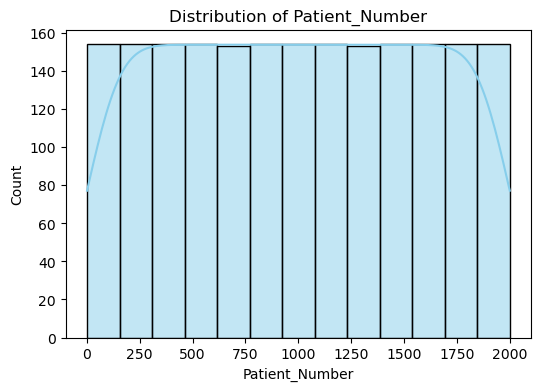

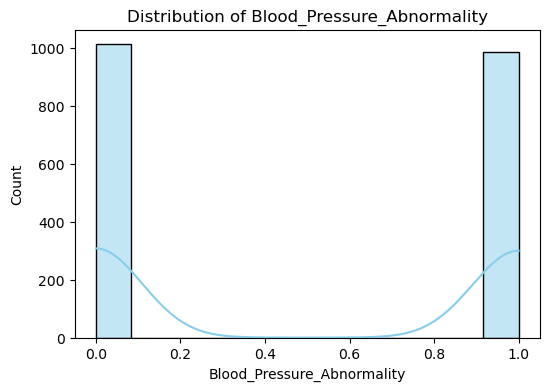

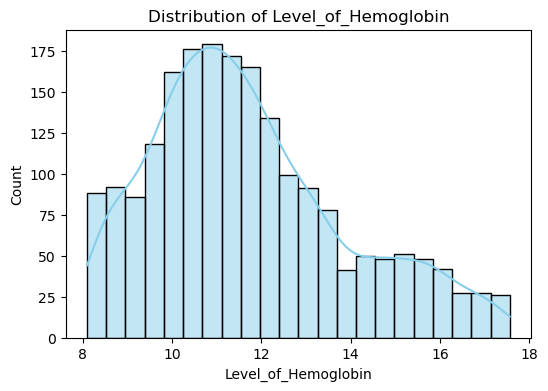

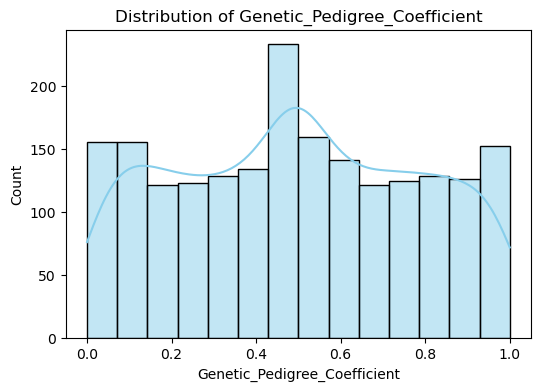

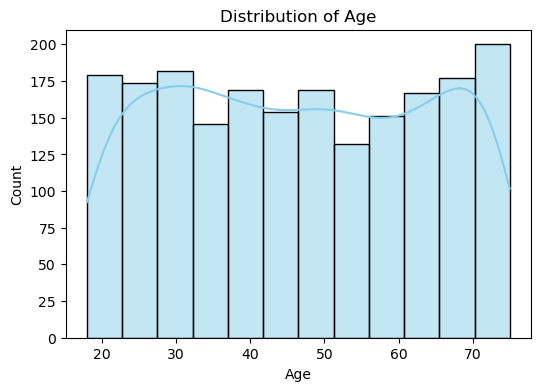

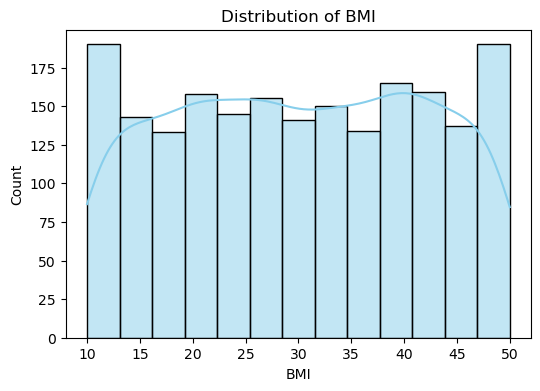

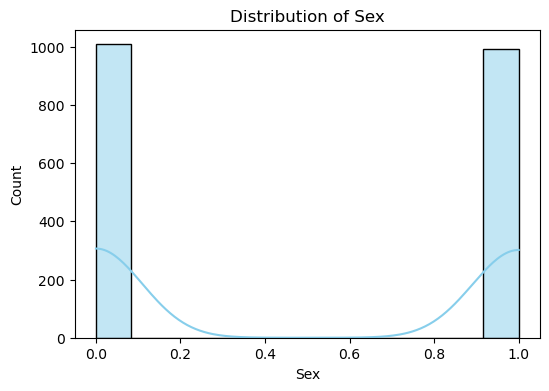

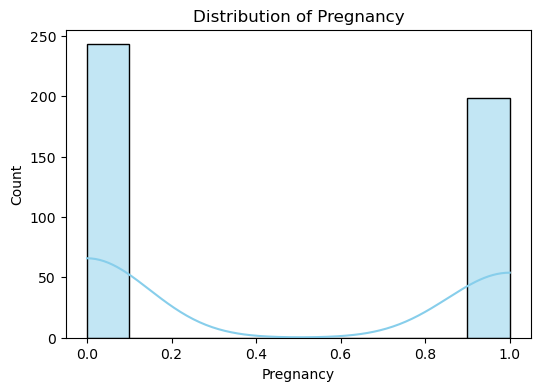

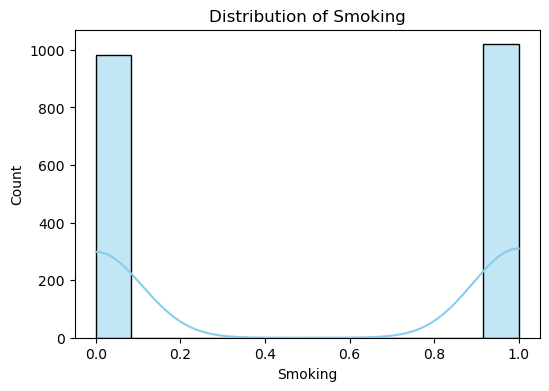

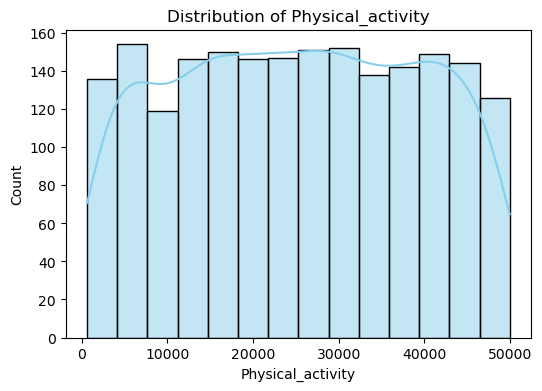

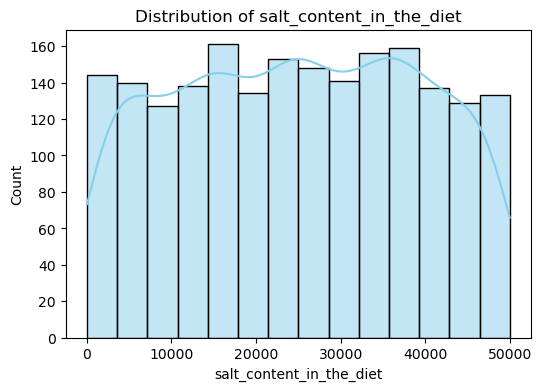

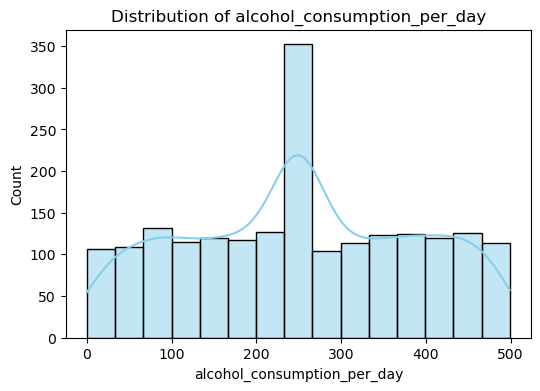

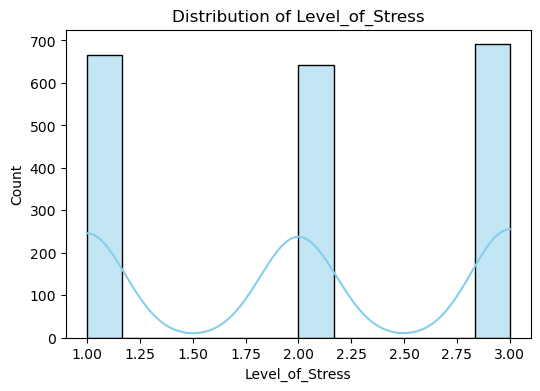

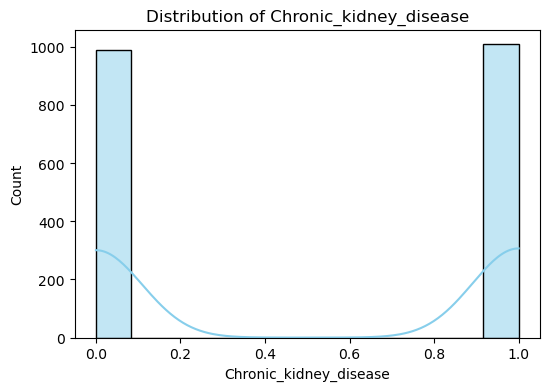

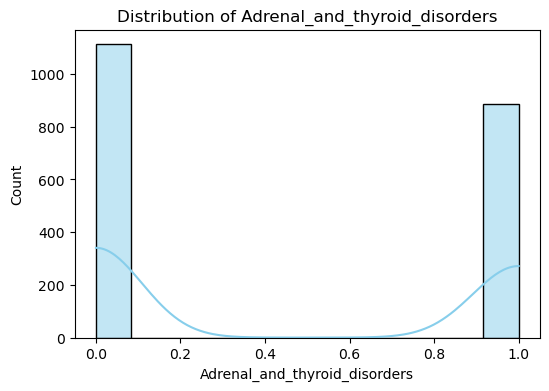

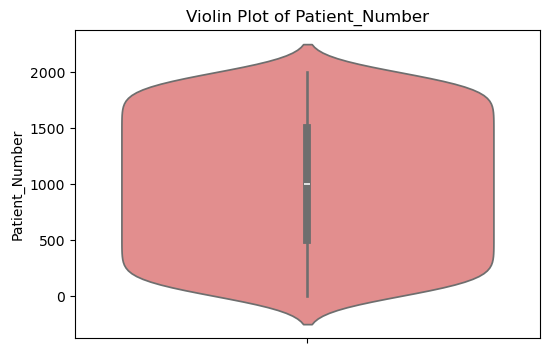

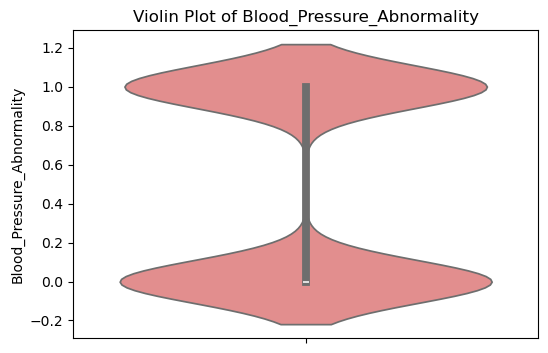

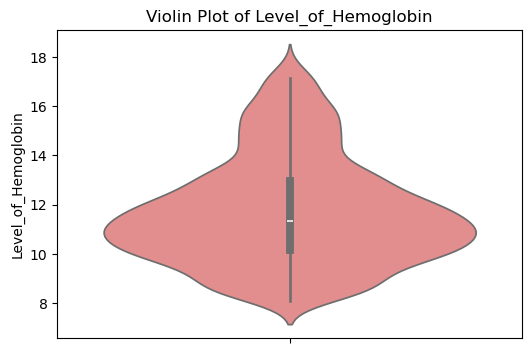

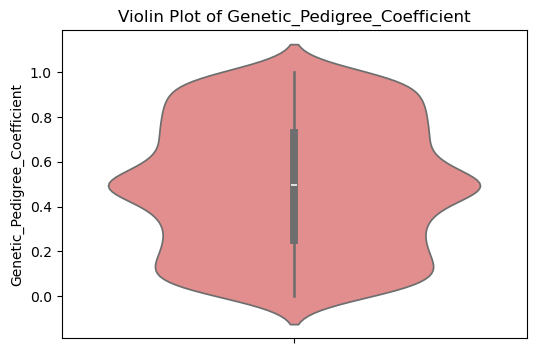

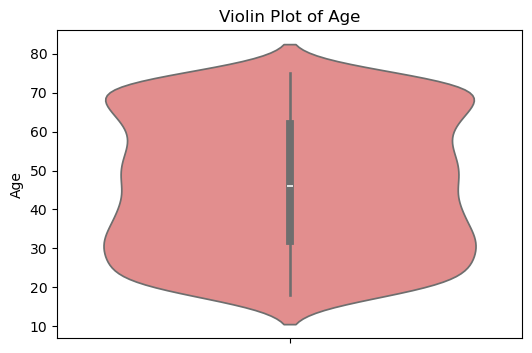

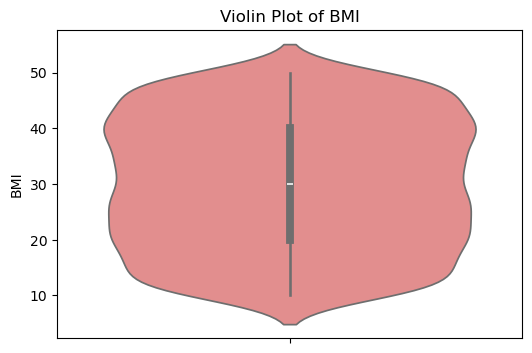

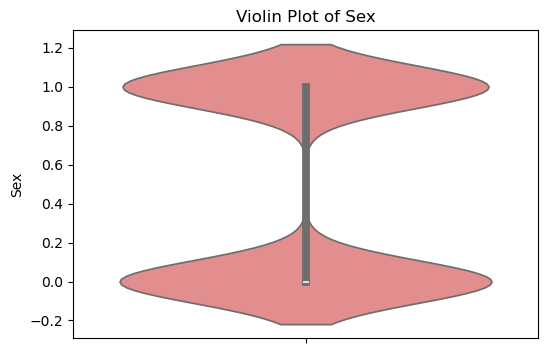

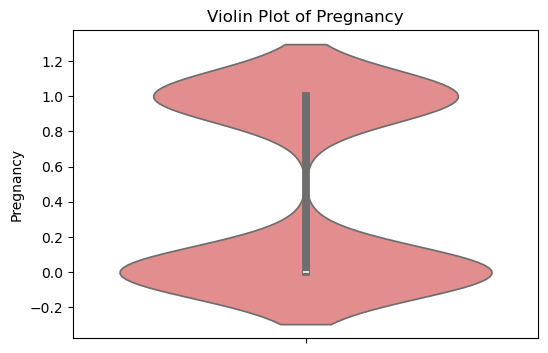

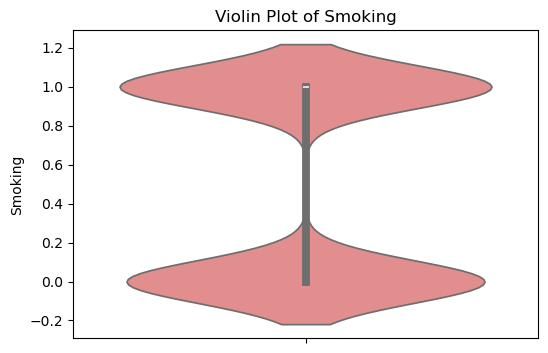

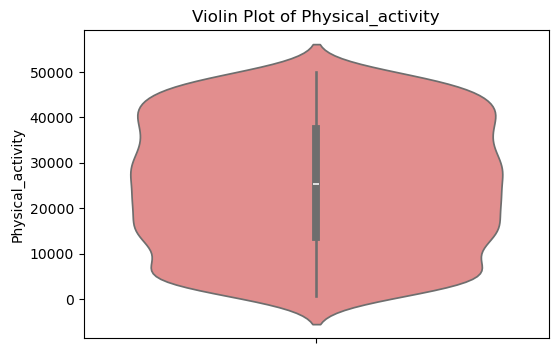

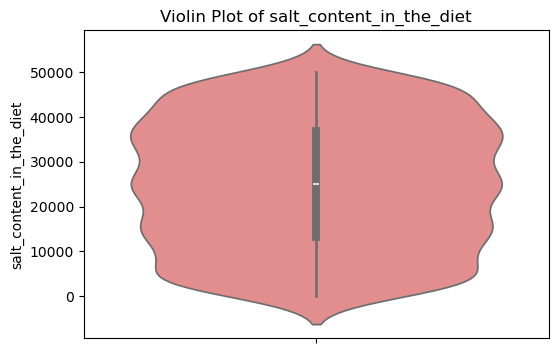

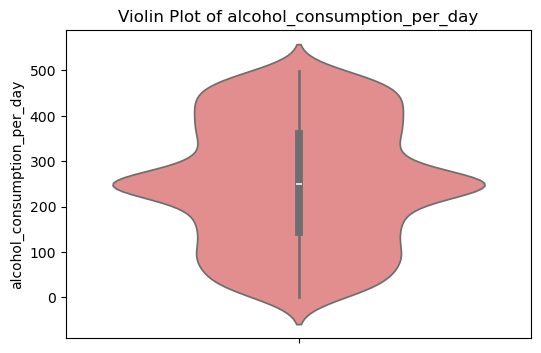

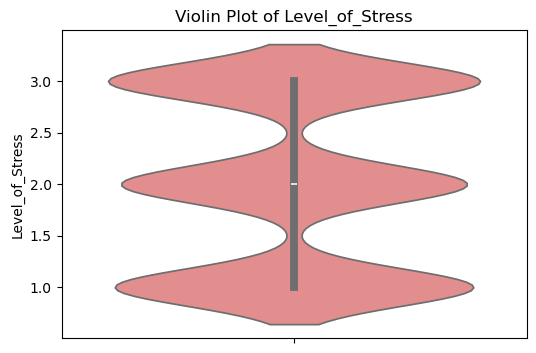

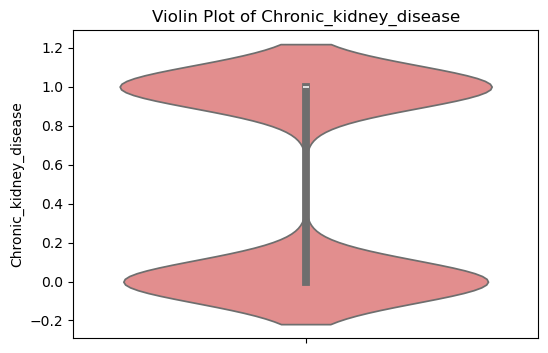

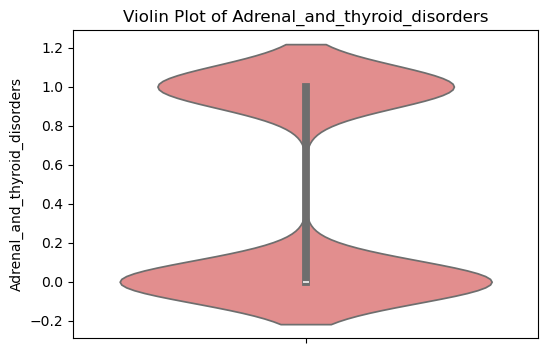

In [17]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(y=df[col], color='lightcoral')
    plt.title(f'Violin Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [18]:
X = df.drop(columns=['Blood_Pressure_Abnormality', 'Patient_Number', 'Pregnancy'])
Y = df['Blood_Pressure_Abnormality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42, stratify=Y)

In [19]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [20]:
class BP_Classifier(nn.Module):
    def __init__(self):
        super(BP_Classifier, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = BP_Classifier()

In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [22]:
epochs = 50
train_loss_list = []
test_acc_list = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = loss_fn(output, y_train)
    loss.backward()
    optimizer.step()

    train_loss_list.append(loss.item())

    model.eval()
    with torch.no_grad():
        preds = model(X_test)
        _, preds_class = torch.max(preds, 1)
        acc = (preds_class == y_test).float().mean()
        test_acc_list.append(acc.item())

        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Test Acc: {acc.item()*100:.2f}%")

Epoch 1/50, Loss: 0.7099, Test Acc: 46.00%
Epoch 2/50, Loss: 0.7078, Test Acc: 45.75%
Epoch 3/50, Loss: 0.7057, Test Acc: 45.75%
Epoch 4/50, Loss: 0.7037, Test Acc: 45.75%
Epoch 5/50, Loss: 0.7018, Test Acc: 46.00%
Epoch 6/50, Loss: 0.6999, Test Acc: 45.50%
Epoch 7/50, Loss: 0.6980, Test Acc: 45.75%
Epoch 8/50, Loss: 0.6961, Test Acc: 46.00%
Epoch 9/50, Loss: 0.6942, Test Acc: 46.25%
Epoch 10/50, Loss: 0.6924, Test Acc: 46.25%
Epoch 11/50, Loss: 0.6905, Test Acc: 47.00%
Epoch 12/50, Loss: 0.6886, Test Acc: 48.25%
Epoch 13/50, Loss: 0.6867, Test Acc: 48.75%
Epoch 14/50, Loss: 0.6849, Test Acc: 49.50%
Epoch 15/50, Loss: 0.6829, Test Acc: 51.25%
Epoch 16/50, Loss: 0.6810, Test Acc: 52.25%
Epoch 17/50, Loss: 0.6790, Test Acc: 53.75%
Epoch 18/50, Loss: 0.6770, Test Acc: 54.25%
Epoch 19/50, Loss: 0.6749, Test Acc: 56.25%
Epoch 20/50, Loss: 0.6728, Test Acc: 58.00%
Epoch 21/50, Loss: 0.6707, Test Acc: 59.25%
Epoch 22/50, Loss: 0.6685, Test Acc: 59.50%
Epoch 23/50, Loss: 0.6662, Test Acc: 60.5

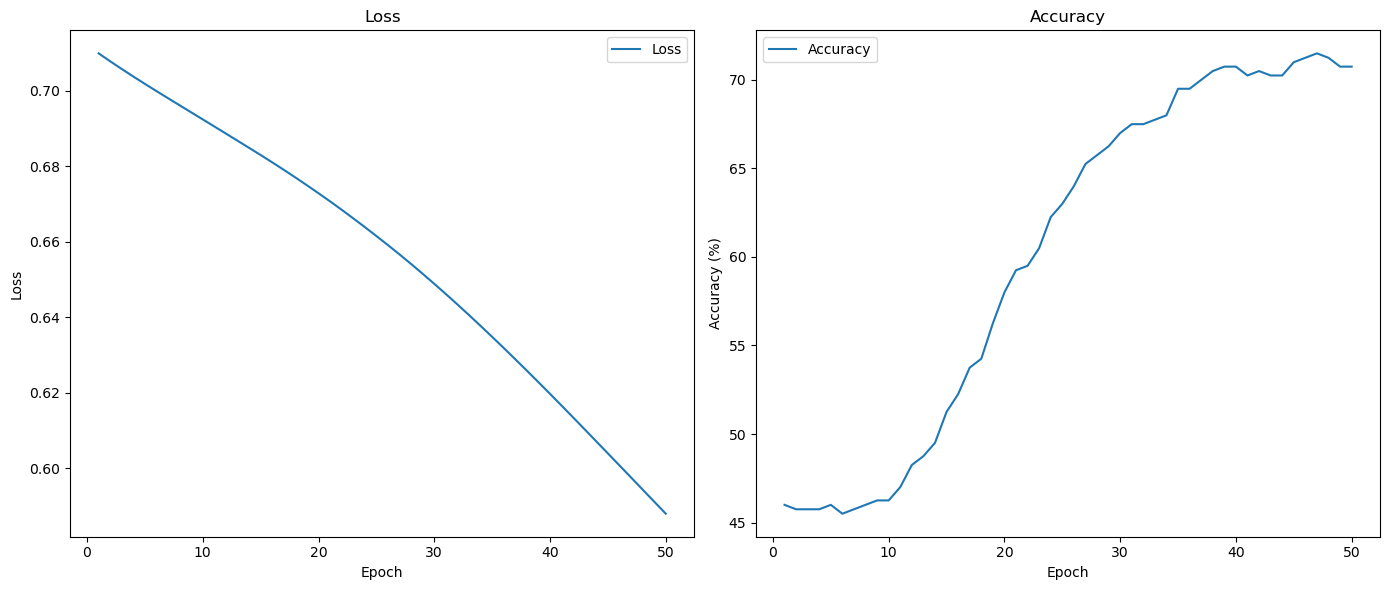

In [23]:
cnt = range(1, len(train_loss_list) + 1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(cnt, train_loss_list, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnt, [acc * 100 for acc in test_acc_list], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()